In [29]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from collections import defaultdict
import pandas as pd

In [20]:
# Paths
images_dir = "../data/train/images"
labels_dir = "../data/train/labels"

# Class mapping
class_map = {
    0: 'dog',
    1: 'cat',
    2: 'cow',
    3: 'goat',
    4: 'boar',
    5: 'deer',
    6: 'leopard'
}

In [21]:
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')])
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])

print(f'Total images: {len(image_files)}')
print(f'Total label files: {len(label_files)}')

Total images: 513
Total label files: 513


dog - 78
cat - 74
cow - 594
goat - 162
boar - 102
deer - 174
leopard - 74


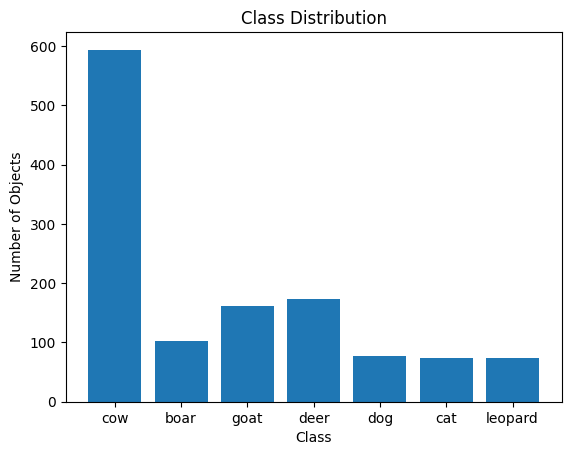

In [38]:
all_classes = []
for label_file in label_files:
    if label_file != "classes.txt":
        with open(os.path.join(labels_dir, label_file)) as f:
            for line in f:
                class_idx = int(line.split()[0])
                all_classes.append(class_idx)

class_counts = Counter(all_classes)

#print all object counts
for class_idx in sorted(class_counts):
    class_name = class_map.get(class_idx, str(class_idx))
    print(f"{class_name} - {class_counts[class_idx]}")

#plot object counts 
plt.bar([class_map[c] for c in class_counts.keys()], class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Objects')
plt.show()

Number of images containing each class:
dog - 67 images
cat - 74 images
cow - 85 images
goat - 70 images
boar - 78 images
deer - 63 images
leopard - 74 images


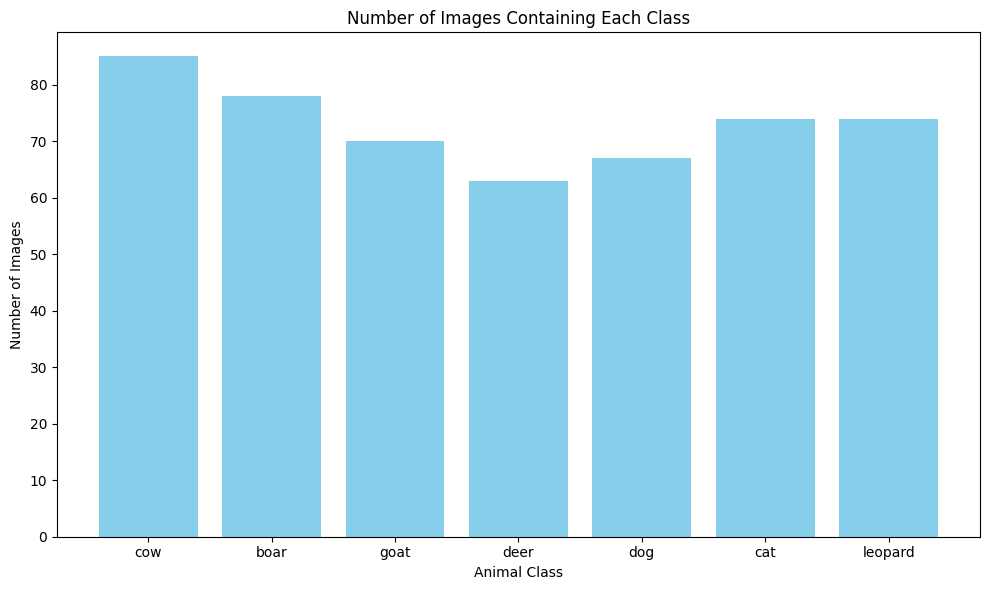

In [41]:
# Dictionary to track images per class
images_per_class = defaultdict(set)

# Process label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt') and label_file != 'classes.txt':
        file_path = os.path.join(labels_dir, label_file)
        
        try:
            with open(file_path, 'r') as f:
                # Get unique classes in this file
                classes_in_file = set()
                for line in f:
                    if line.strip():
                        class_val = int(line.split()[0])
                        classes_in_file.add(class_val)
                
                # Add to images_per_class
                for class_val in classes_in_file:
                    images_per_class[class_val].add(label_file)
                    
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")

# Count images per class
image_counts = {class_val: len(files) for class_val, files in images_per_class.items()}

# Print results
print("Number of images containing each class:")
for class_val in sorted(image_counts.keys()):
    class_name = class_map.get(class_val, f"unknown ({class_val})")
    count = image_counts[class_val]
    print(f"{class_name} - {count} images")


# Plot results
class_names = [class_map.get(c, c) for c in image_counts.keys()]
counts = list(image_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title('Number of Images Containing Each Class')
plt.xlabel('Animal Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()